In [0]:
# Get the dataset
!wget -cq [redacted] # See README for MURA Dataset Research Use Agreement

# Unzip
!unzip -qq MURA-v1.1.zip

In [0]:
!ls

MURA-v1.1  MURA-v1.1.zip  sample_data


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications.densenet import DenseNet169
from keras.models import Model
from keras import layers
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [0]:
data_dir = 'MURA-v1.1'

train_dir = data_dir + '/train' # Path to train directory
val_dir = data_dir + '/valid' # Path to validation directory

ABNORMAL


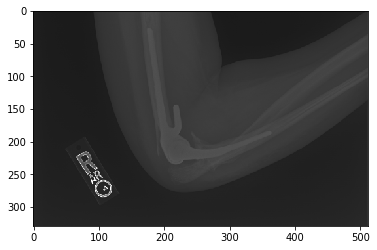

In [0]:
# Display abnormal bone image
img_abnormal = load_img('MURA-v1.1/train/XR_ELBOW/patient00069/study1_positive/image2.png')
print('ABNORMAL')
plt.imshow(img_abnormal)
plt.show()

NORMAL


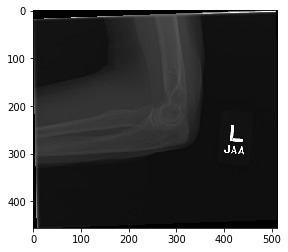

In [0]:
# Display normal bone image
img_normal = load_img('MURA-v1.1/train/XR_ELBOW/patient00011/study1_negative/image1.png')
print('NORMAL')
plt.imshow(img_normal)
plt.show()

In [0]:
# Train set studies with labels
df=pd.read_csv('MURA-v1.1/train_labeled_studies.csv', names=['Train_Image','Train_Label'])

In [0]:
df.head(20)

,Train_Image,Train_Label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1
5,MURA-v1.1/train/XR_SHOULDER/patient00006/study...,1
6,MURA-v1.1/train/XR_SHOULDER/patient00007/study...,1
7,MURA-v1.1/train/XR_SHOULDER/patient00007/study...,0
8,MURA-v1.1/train/XR_SHOULDER/patient00008/study...,1
9,MURA-v1.1/train/XR_SHOULDER/patient00009/study...,1


0    8280
1    5177
Name: Train_Label, dtype: int64


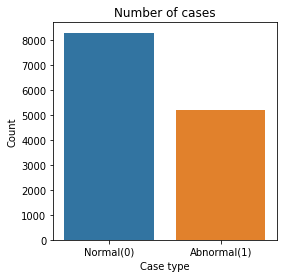

In [0]:
# Count labels in train set
cases_count = df['Train_Label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(4,4))
sns.barplot(x=cases_count.index, y=cases_count.values)
plt.title('Number of cases', fontsize=12)
plt.xlabel('Case type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Abnormal(1)'])
plt.show()

In [0]:
# Adding labels to individual images in train set
df=pd.read_csv('MURA-v1.1/train_image_paths.csv', names=['Train_Image'])
names=df['Train_Image'].values
train_labels=[]

for i in names:
  if ('positive' in i):
    train_labels.append('1')
  elif('negative' in i):
    train_labels.append('0')

train_labels = np.array(train_labels)
#labels = pd.DataFrame(labels, columns=['Image', 'Label'])
df.insert(1, 'Train_Label', train_labels)
df.to_csv('Train_set.csv', index=False)

In [0]:
df.head(20)

,Train_Image,Train_Label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
5,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
6,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
7,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
8,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
9,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1


0    21935
1    14873
Name: Train_Label, dtype: int64


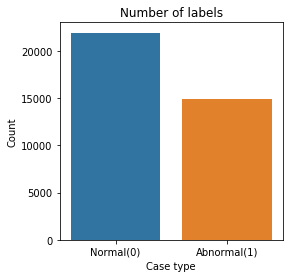

In [0]:
# Count individual number of labels of images in train set
cases_count = df['Train_Label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(4,4))
sns.barplot(x=cases_count.index, y=cases_count.values)
plt.title('Number of labels', fontsize=12)
plt.xlabel('Case type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Abnormal(1)'])
plt.show()

In [0]:
#Validation set studies with labels
df=pd.read_csv('MURA-v1.1/valid_labeled_studies.csv', names=['Valid_Image','Valid_Label'])

In [0]:
df.head(20)

,Valid_Image,Valid_Label
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1
5,MURA-v1.1/valid/XR_WRIST/patient11188/study1_p...,1
6,MURA-v1.1/valid/XR_WRIST/patient11189/study1_p...,1
7,MURA-v1.1/valid/XR_WRIST/patient11190/study1_p...,1
8,MURA-v1.1/valid/XR_WRIST/patient11191/study1_p...,1
9,MURA-v1.1/valid/XR_WRIST/patient11192/study1_p...,1


0    661
1    538
Name: Valid_Label, dtype: int64


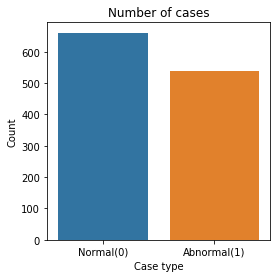

In [0]:
# Count labels in validation set
cases_count = df['Valid_Label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(4,4))
sns.barplot(x=cases_count.index, y=cases_count.values)
plt.title('Number of cases', fontsize=12)
plt.xlabel('Case type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Abnormal(1)'])
plt.show()

In [0]:
# Adding labels to individual images in validation set
df=pd.read_csv('MURA-v1.1/valid_image_paths.csv', names=['Valid_Image'])
names=df['Valid_Image'].values
valid_labels=[]

for i in names:
  if ('positive' in i):
    valid_labels.append('1')
  elif('negative' in i):
    valid_labels.append('0')

valid_labels = np.array(valid_labels)
#labels = pd.DataFrame(labels, columns=['Image', 'Label'])
df.insert(1, 'Valid_Label', valid_labels)
df.to_csv('Valid_set.csv', index=False)

In [0]:
df.head(20)

,Valid_Image,Valid_Label
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
5,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
6,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
7,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
8,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
9,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1


0    1667
1    1530
Name: Valid_Label, dtype: int64


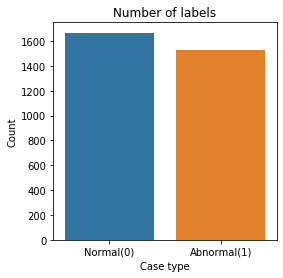

In [0]:
# Count individual number of labels of images in validation set
cases_count = df['Valid_Label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(4,4))
sns.barplot(x=cases_count.index, y=cases_count.values)
plt.title('Number of labels', fontsize=12)
plt.xlabel('Case type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Abnormal(1)'])
plt.show()

In [0]:
# Read Training and Validation .csv files
train_df = pd.read_csv("./Train_set.csv", dtype=str)
valid_df = pd.read_csv("./Valid_set.csv", dtype=str)

datagen = ImageDataGenerator(rescale=1./255, rotation_range=30)

In [0]:
# Image Preprocessing
train_generator = datagen.flow_from_dataframe(dataframe=train_df, directory=None,
                                              x_col="Train_Image", y_col="Train_Label",
                                              target_size=(224,224), class_mode="binary",
                                              batch_size=16, shuffle=True)

valid_generator = datagen.flow_from_dataframe(dataframe=valid_df, directory=None,
                                              x_col="Valid_Image", y_col="Valid_Label",
                                              target_size=(224,224), class_mode="binary",
                                              batch_size=16, shuffle=True)

Found 36808 validated image filenames belonging to 2 classes.
Found 3197 validated image filenames belonging to 2 classes.


In [0]:
# Import DenseNet169 pre-trained model
dense_model = DenseNet169(include_top=True, weights='imagenet')

In [0]:
dense_model.summary()

Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [0]:
# Pop off the last layer
dense_model.layers.pop()

In [0]:
# Compile the model
predictions = Dense(1, activation='sigmoid')(dense_model.layers[-1].output)
model = Model(inputs=dense_model.input, outputs=predictions)

model.compile(optimizer = Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [0]:
# Number of train and validation steps
train_steps=train_generator.n//train_generator.batch_size
valid_steps=valid_generator.n//valid_generator.batch_size

In [0]:
filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', save_best_only=True, verbose=1, mode='max')

In [0]:
# Fit the model
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_steps,
                    validation_data=valid_generator,
                    validation_steps=valid_steps,
                    epochs=15,
                    callbacks=[checkpoint])



Epoch 1/15
2300/2300 [==============================] - 1690s 735ms/step - loss: 0.5181 - acc: 0.7548 - val_loss: 0.5198 - val_acc: 0.7453

Epoch 00001: val_acc improved from -inf to 0.74529, saving model to weights.hdf5
Epoch 2/15
2300/2300 [==============================] - 1626s 707ms/step - loss: 0.4602 - acc: 0.7944 - val_loss: 0.4672 - val_acc: 0.7966

Epoch 00002: val_acc improved from 0.74529 to 0.79660, saving model to weights.hdf5
Epoch 3/15
2300/2300 [==============================] - 1624s 706ms/step - loss: 0.4396 - acc: 0.8078 - val_loss: 0.4512 - val_acc: 0.8045

Epoch 00003: val_acc improved from 0.79660 to 0.80446, saving model to weights.hdf5
Epoch 4/15
2300/2300 [==============================] - 1627s 707ms/step - loss: 0.4203 - acc: 0.8186 - val_loss: 0.4969 - val_acc: 0.7617

Epoch 00004: val_acc did not improve from 0.80446
Epoch 5/15
2300/2300 [==============================] - 1629s 708ms/step - loss: 0.4066 - acc: 0.8258 - val_loss: 0.4299 - val_acc: 0.8192


In [0]:
!ls

MURA-v1.1      sample_data    Valid_set.csv
MURA-v1.1.zip  Train_set.csv  weights.hdf5


In [0]:
from google.colab import files
files.download('weights.hdf5')